# Demo of solving a Poisson equation on a square

In [2]:
from libs.utils import *
from libs.mesh import *
from libs.fem import *
from example.data import *

import matplotlib.tri as tri
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go

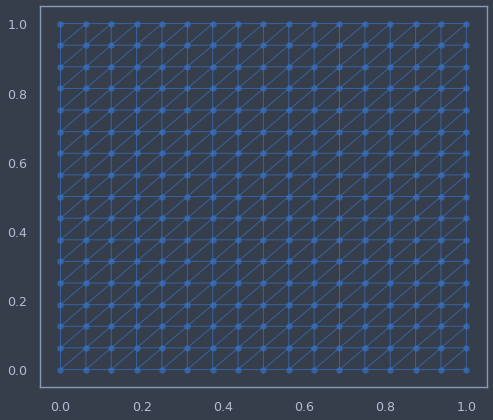

In [29]:
node, elem = rectangleMesh(x_range=(0,1), y_range=(0,1), h=1/16)
# triangulation = tri.Triangulation(node[:,0], node[:,1], elem)

# meshPlot = ff.create_trisurf(x=node[:,0], y=node[:,1], z=1e-5*np.random.randn(node.shape[0]),
#                          simplices=elem,
#                          showbackground=False,
#                          title="mesh", 
#                          aspectratio=dict(x=1, y=1, z=1e-5))
# meshPlot.update_layout(coloraxis_showscale=False)
# fig = go.Figure(data=meshPlot)
# fig.update_layout(template='plotly_dark', 
#                  scene_camera = dict(eye=dict(x=0., y=0., z=2.5))
#                  )
# fig.show()

plt.triplot(triangulation, 'b-h', linewidth=1, alpha=0.7)
plt.show()

# Poisson

- Get pde data
- Compute auxiliary data structures
- Direct solve
- Plot solution and the gradient field

In [31]:
pde = DataSinCos()
T = TriMesh2D(node,elem)
T.update_auxstructure()
T.compute_gradbasis()
soln, _ = Poisson2DLite(T, pde)

In [32]:
surf = ff.create_trisurf(x=node[:,0], y=node[:,1], z=soln['u'],
                         simplices=elem,
                         colormap="Viridis", # similar to matlab's default colormap
                         showbackground=False,
                         title="FE approx", 
                         aspectratio=dict(x=1, y=1, z=1))
fig = go.Figure(data=surf)
fig.update_layout(template='plotly_dark')
fig.show()

In [39]:
center = node[elem].mean(axis=1)

DuPlot = ff.create_quiver(x=center[:,0], y=center[:,1], 
                       u=soln['Du'][:,0], v=soln['Du'][:,1],
                       scale=.02,
                       arrow_scale=.1,
                       name='quiver',
                       line_width=1.5)

DuPlot.add_trace(go.Scatter(x=node[:,0], y=node[:,1],
                    mode='markers',
                    marker_size=5,
                    name='vertices'))

fig = go.Figure(data=DuPlot)
fig.update_layout(template='plotly_dark',
                  width=800, height=600,
                  margin=dict(l=10, r=10, t=10, b=10),)
fig.show()